BASIC EDA

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/all_reads.tsv", sep="\t")
print(df.shape)
df["label"].value_counts(normalize=True)

(39983, 30)


label
1    0.500213
0    0.499787
Name: proportion, dtype: float64

In [28]:
import pandas as pd

features_to_plot = [
    "sa_count",
    "softclip_left",
    "softclip_right",
    "kmer_js_divergence",
    "kmer_cosine_diff",
    "microhomology_length",
]

summary_list = []

for feat in features_to_plot:
    stats = (
        df.groupby("label")[feat]
          .describe(percentiles=[0.25, 0.5, 0.75])  # mean, std, 25/50/75%, etc.
          .reset_index()
    )
    stats.insert(0, "feature", feat)
    summary_list.append(stats)

summary_df = pd.concat(summary_list, ignore_index=True)
print(summary_df)

                 feature  label    count       mean        std       min  \
0               sa_count      0  19983.0   0.000000   0.000000  0.000000   
1               sa_count      1  20000.0   0.405850   0.491068  0.000000   
2          softclip_left      0  19983.0   0.225392   1.542914  0.000000   
3          softclip_left      1  20000.0  12.546200  21.897670  0.000000   
4         softclip_right      0  19983.0   0.212080   1.513480  0.000000   
5         softclip_right      1  20000.0  12.895550  22.123330  0.000000   
6     kmer_js_divergence      0  19983.0   0.975804   0.024648  0.789216   
7     kmer_js_divergence      1  20000.0   0.974322   0.025107  0.814286   
8       kmer_cosine_diff      0  19983.0   0.975813   0.025168  0.762416   
9       kmer_cosine_diff      1  20000.0   0.974302   0.025729  0.816883   
10  microhomology_length      0  19983.0   0.461742   0.757920  0.000000   
11  microhomology_length      1  20000.0   0.458400   0.755181  0.000000   

         25

In [ ]:
summary_df.to_csv("feature_summary_by_class.tsv", sep="\t", index=False)

In [35]:
import matplotlib.pyplot as plt

features_to_plot = [
    "sa_count",
    "softclip_left",
    "softclip_right",
    "kmer_js_divergence",
    "kmer_cosine_diff",
    "microhomology_length",
]

for feat in features_to_plot:
    plt.figure(figsize=(5, 4))
    for label, color, name in [(0, "tab:blue", "clean"), (1, "tab:orange", "chimeric")]:
        subset = df.loc[df["label"] == label, feat]
        plt.hist(
            subset,
            bins=40,
            density=True,
            alpha=0.5,
            label=name,
        )
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.title(f"{feat} by class")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/eda_{feat}.png", dpi=300, bbox_inches="tight")
    plt.close()

Correlation heatmap (numeric only)

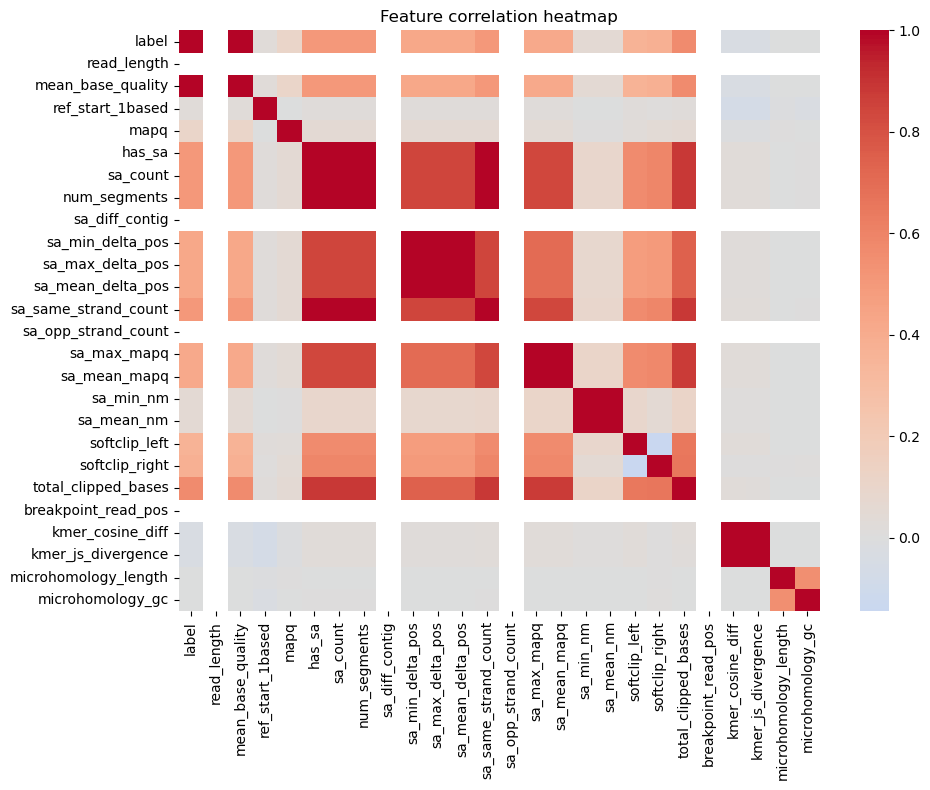

In [20]:
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation heatmap")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

df = pd.read_csv("../data/processed/all_reads.tsv", sep="\t")
print(df.shape)
df.head()

(39983, 30)


,read_id,label,read_length,mean_base_quality,ref_name,ref_start_1based,strand,mapq,cigar,has_sa,...,sa_min_nm,sa_mean_nm,softclip_left,softclip_right,total_clipped_bases,breakpoint_read_pos,kmer_cosine_diff,kmer_js_divergence,microhomology_length,microhomology_gc
0,NC_039553.1_5615_6078_7:0:0_2:0:0_c43,0,150,13.0,NC_039553.1,5929,-,60,150M,0,...,0,0.0,0,0,0,75,1.000000,1.000000,0,0.0
1,NC_039553.1_7137_7671_7:0:0_8:0:0_115d,0,150,13.0,NC_039553.1,7137,+,60,150M,0,...,0,0.0,0,0,0,75,0.957143,0.957143,1,1.0
2,chimera_1_A9831-10051_B14983-15061_MH0_249619_...,1,150,40.0,NC_039553.1,2034,-,60,141M9S,0,...,0,0.0,0,9,9,75,1.000000,1.000000,0,0.0
3,chimera_1_A9831-10051_B14983-15061_MH0_32000_3...,1,150,40.0,NC_039553.1,154,-,60,136M14S,0,...,0,0.0,0,14,14,75,0.957143,0.957143,1,0.0
4,NC_039553.1_14490_15018_4:0:0_7:0:0_1401,0,150,13.0,NC_039553.1,14490,+,60,150M,0,...,0,0.0,0,0,0,75,0.972222,0.971429,2,0.5


In [14]:
df.groupby("label").mean(numeric_only=True).T.sort_values(by=0, ascending=False).head(30)

label,0,1
ref_start_1based,8200.120953,8428.634600
read_length,150.000000,150.000000
breakpoint_read_pos,75.000000,75.000000
mapq,59.663464,59.987000
mean_base_quality,13.000000,40.000000
num_segments,1.000000,1.405850
kmer_cosine_diff,0.975813,0.974302
kmer_js_divergence,0.975804,0.974322
microhomology_length,0.461742,0.458400
total_clipped_bases,0.437472,25.441750
